In [1]:
import numpy as np
from sklearn.decomposition import PCA
from PIL import Image
import matplotlib.pyplot as plt

# Load and preprocess the image
image = Image.open('datasets\\colorful-night.jpg').resize((256, 256))


In [5]:
image = image.convert('L')  # Convert to grayscale
img_array = np.array(image)

Image.fromarray(img_array).save('output\\colorful-night-gray.jpg')



In [7]:
img_array.shape

(256, 256)

In [75]:
# Initialize and apply PCA
n_components = 100  # for example, to reduce to 100 principal components
pca = PCA(n_components=10, svd_solver='full')
pca.fit(img_array)
compressed_img = pca.transform(img_array)
print(f'Shape of compressed image:{compressed_img.shape}. Len = {len(compressed_img)}')

# Reconstruct the image from the compressed representation
reconstructed_img = pca.inverse_transform(compressed_img).reshape(img_array.shape)

# Convert back to image format and save or display
reconstructed_image = Image.fromarray(reconstructed_img.astype(np.uint8))

reconstructed_image.save('output\\colorful-night-compressed.jpg')
# reconstructed_image.show()




Shape of compressed image:(256, 10). Len = 256


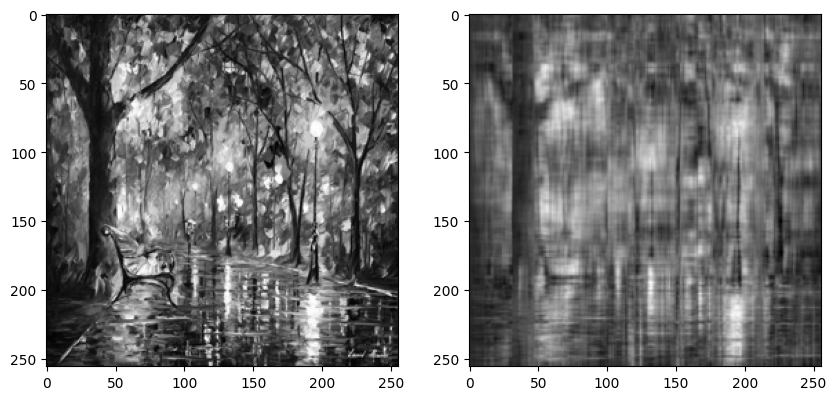

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

# Display first image
axes[0].imshow(img_array, cmap='gray')
# axes[0].axis('off')  # Turn off axis

# Display second image
axes[1].imshow(reconstructed_img, cmap='gray')
# axes[1].axis('off')  # Turn off axis

# Show the plot
plt.show()